In [1]:
import os
import cv2
import numpy as np
import SimpleITK as sitk
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import imageio
import numpy as np
import nrrd
import tensorflow as tf


In [2]:
img_path = '/storage/ziaeea21/projects/Prostate_Segmentation/data/orginal_label/labels.nrrd'
save_path = "/storage/ziaeea21/projects/Prostate_Segmentation/data/Train/labels/"

In [3]:
def read_data(img_path):
    readdata, header = nrrd.read(img_path)
    print('The shape of data is: ',readdata.shape)
    return readdata

In [15]:
def preprocess_save_imgs(readdata, save_path):
    
    t=readdata[:,:,:]
    t=cv2.resize( t  , (256 , 256))
    # rr=np.flip(t)
    tt=np.rot90(t)
    ttt=np.rot90(tt)
    tttt=np.rot90(ttt)
    g=np.fliplr(tttt)
    #g=g * 63.75
    n=np.shape (g)[-1]

    os.makedirs(save_path, exist_ok=True)

    for i in range(n):

        Slice = g[:,:,i]
        Slice = tf.cast(Slice, tf.uint8)
        Name = save_path + "Slices0144%s"%(i)+".png" 
        imageio.imwrite(Name,Slice)
        
        
def find_number_of_classes(readdata):
    n_classes = []
    for i in range(readdata.shape[2]):
        n_classes.append(len(np.unique(readdata[:,:,i]))) 
    #print('Number of classes: ', np.max(n_classes))
    return np.max(n_classes)
    
def show_img(readdata):
    rnd_img = np.random.randint(0,readdata.shape[2])
    n_classes = find_number_of_classes(readdata)
    fig, axs = plt.subplots(1,n_classes, figsize=(15, 6), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    print('Unique numbers in the image are: ', np.unique(readdata[:,:, rnd_img]))

    print('Image number: ', rnd_img)
    for i in range(n_classes):
        axs[i].imshow(readdata[:,:,rnd_img]==i)
        axs[i].set_title(str(i))

    plt.show()

In [16]:
readdata = read_data(img_path)


The shape of data is:  (384, 384, 19)


Unique numbers in the image are:  [0 1 2 4]
Image number:  10


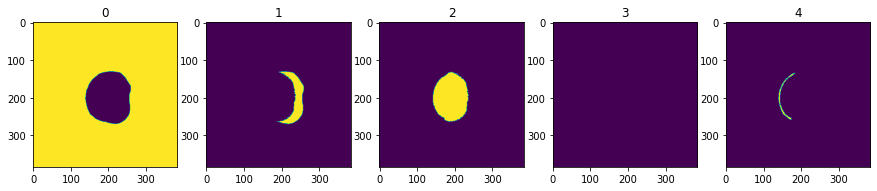

In [17]:
show_img(readdata)

In [18]:
preprocess_save_imgs(readdata, save_path)